11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Dataset loaded with shape: (70000, 784)
Original data shape: (70000, 784)
Reduced data shape: (70000, 50)


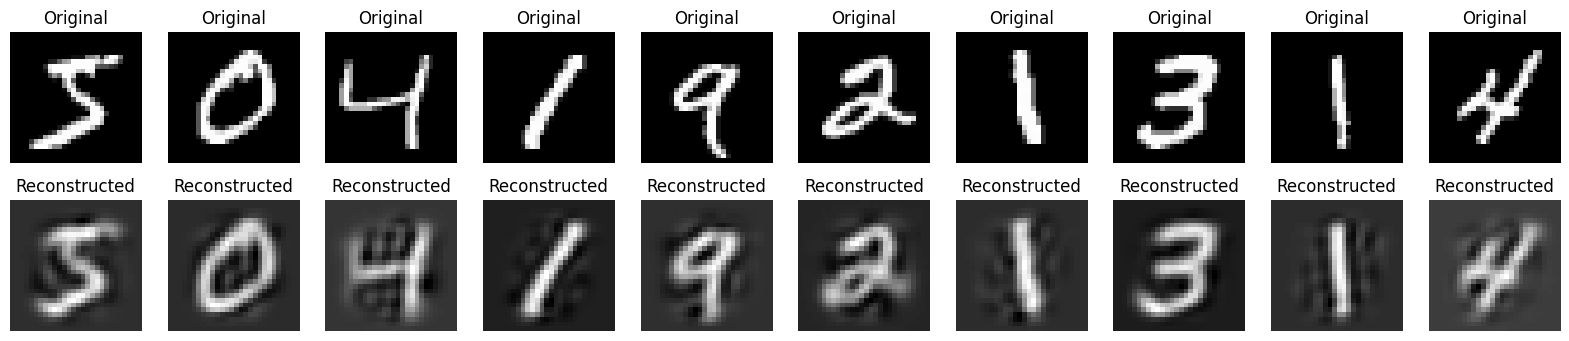

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Flatten and normalize the images
X = X.reshape(X.shape[0], -1) / 255.0
print(f"Dataset loaded with shape: {X.shape}")

# Step 2: Apply Randomized PCA
n_components = 50  # Number of principal components
pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_pca = pca.fit_transform(X)

print(f"Original data shape: {X.shape}")
print(f"Reduced data shape: {X_pca.shape}")

# Step 3: Reconstruct some images
X_reconstructed = pca.inverse_transform(X_pca)

# Visualize original and reconstructed images
def plot_digits(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")

# Display original and reconstructed images
plot_digits(X, X_reconstructed)
plt.show()


Dataset loaded with shape: (70000, 784)
Original data shape: (1000, 784)
Reduced data shape: (1000, 50)


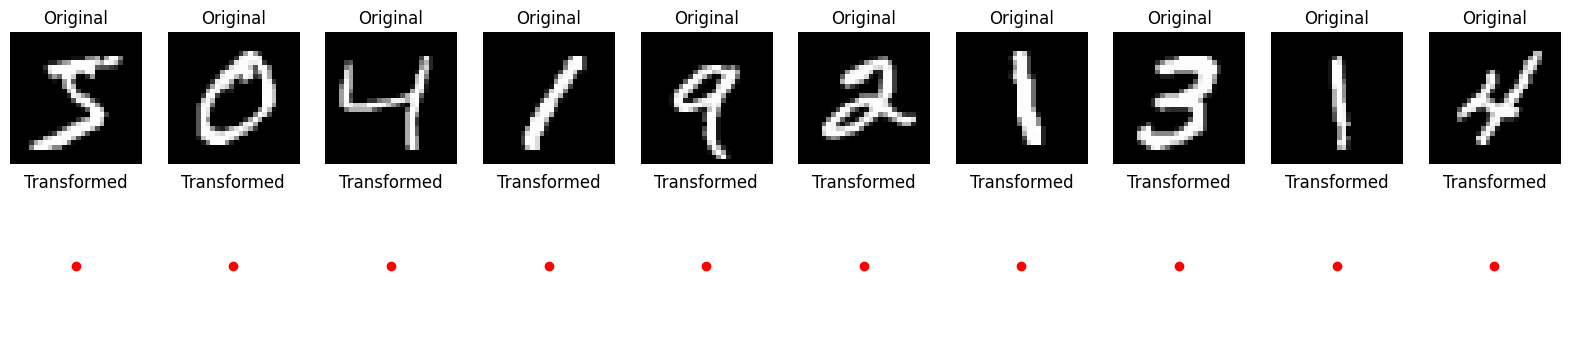

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Flatten and normalize the images
X = X.reshape(X.shape[0], -1) / 255.0
print(f"Dataset loaded with shape: {X.shape}")

# For faster execution, we will use only a subset of the data
X = X[:1000]  # Use only 1000 samples for KernelPCA

# Step 2: Apply Kernel PCA
n_components = 50  # Number of principal components
kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.01, random_state=42)
X_kpca = kpca.fit_transform(X)

print(f"Original data shape: {X.shape}")
print(f"Reduced data shape: {X_kpca.shape}")

# Visualize a few of the images after KernelPCA transformation (not reconstructed)
def plot_digits_transformed(original, transformed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Transformed images (after applying KernelPCA)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.scatter(transformed[i, 0], transformed[i, 1], color='red')  # Plot the 2D KernelPCA projection
        plt.title("Transformed")
        plt.axis("off")

# Display original images and their KernelPCA projections
plot_digits_transformed(X, X_kpca)
plt.show()
